## CS 773 - Course Project
#### Dániel Bence Papp
#### 07/22/2023

# Imports

In [139]:
import pandas as pd

In [140]:
data = pd.read_csv('airline_passenger_satisfaction-2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [141]:
DATA_SIZE = data.shape[0]
MAIN_FEATURES = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

# Question 1

In [142]:
data[['Departure Delay', 'Arrival Delay']].describe()

,Departure Delay,Arrival Delay
count,129880.000000,129487.000000
mean,14.713713,15.091129
std,38.071126,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


In [143]:
data[['Departure Delay', 'Arrival Delay']].mode()

,Departure Delay,Arrival Delay
0,0,0.0


In [144]:
data[['Departure Delay', 'Arrival Delay']].median()

Departure Delay    0.0
Arrival Delay      0.0
dtype: float64

In [145]:
data[['Departure Delay', 'Arrival Delay']].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

,Departure Delay,Arrival Delay
0.10,0.0,0.0
0.25,0.0,0.0
0.50,0.0,0.0
0.75,12.0,13.0
0.90,44.0,44.0


In [146]:
data[['Departure Delay', 'Arrival Delay']].skew()

Departure Delay    6.821980
Arrival Delay      6.670125
dtype: float64

In [147]:
data[['Departure Delay', 'Arrival Delay']].cov()

,Departure Delay,Arrival Delay
Departure Delay,1449.410651,1408.468314
Arrival Delay,1408.468314,1479.606248


In [148]:
data[['Departure Delay', 'Arrival Delay']].corr('pearson')

,Departure Delay,Arrival Delay
Departure Delay,1.000000,0.965291
Arrival Delay,0.965291,1.000000


array([[<Axes: title={'center': 'Departure Delay'}>,
        <Axes: title={'center': 'Arrival Delay'}>]], dtype=object)

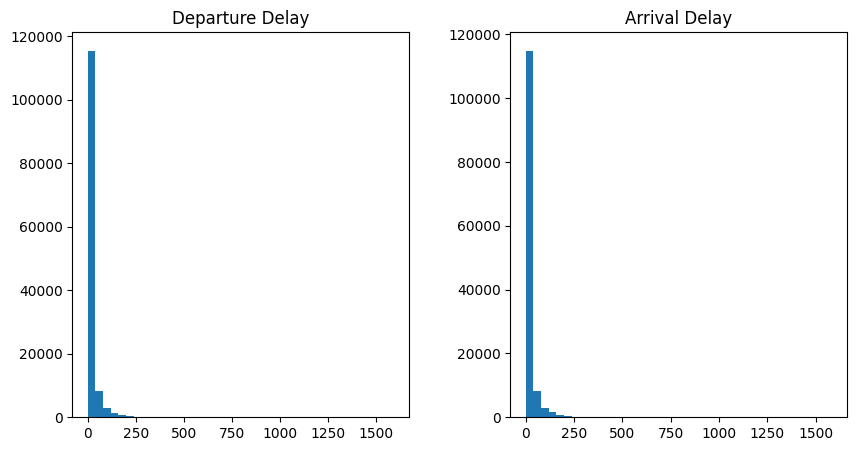

In [149]:
data[['Departure Delay', 'Arrival Delay']].hist(bins=40, figsize=(10, 5), grid=False)

In [150]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Question 2
## Discretization of nominal features

Discretize age (A3) to nominal values using the following criteria: 0-15: Child; 16-35: Youth; 36-55 Middle age; 56-70: Old; >70- Senior

Discretize flight distance (A7) to nominal values using the following criteria: 0-500 miles: Short haul; 501-3000 miles: Medium haul; >3000 Long haul

Discretize delays (A8 and A9) to nominal values: Small: 0-15; Medium: 16-45; Long: > 45

In [151]:
# discretize the satisfaction column to 0 and 1
# 0 = neutral or dissatisfied
# 1 = satisfied
# correlation between in-flight service and satisfaction for long-haul flights only

data['d_Satisfaction'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

data['d_Age'] = pd.cut(data['Age'], bins=[0, 15, 35, 55, 70, 100], labels=['Child', 'Youth', 'Middle Age', 'Old', 'Senior'])

data['d_Flight Distance'] = pd.cut(data['Flight Distance'], bins=[0, 500, 3000, 10000], labels=['Short Haul', 'Medium Haul','Long Haul'])

data['d_Arrival Delay'] = pd.cut(data['Arrival Delay'], bins=[-0.1, 15, 45, 1600], labels=['Small', 'Medium', 'Long'])

data['d_Departure Delay'] = pd.cut(data['Departure Delay'], bins=[-0.1, 15, 45, 1600], labels=['Small', 'Medium', 'Long'])

In [152]:
data.head(20)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,d_Satisfaction,d_Age,d_Flight Distance,d_Arrival Delay,d_Departure Delay
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,3,5,5,Neutral or Dissatisfied,0,Middle Age,Medium Haul,Small,Small
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,2,5,5,Satisfied,1,Youth,Medium Haul,Medium,Medium
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,4,3,3,Satisfied,1,Middle Age,Medium Haul,Small,Small
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,2,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,3,3,3,Satisfied,1,Middle Age,Long Haul,Small,Small
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,4,Satisfied,1,Middle Age,Long Haul,Small,Small
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,3,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,3,3,Satisfied,1,Old,Medium Haul,Small,Small
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,4,4,4,Neutral or Dissatisfied,0,Middle Age,Medium Haul,Small,Small
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,2,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small


# Question 3

In [153]:
# correlation between in-flight service and satisfaction for long-haul flights only which are over 3000 miles

df = data[data['Flight Distance'] > 3000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10313 entries, 4 to 129855
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   ID                                      10313 non-null  int64   
 1   Gender                                  10313 non-null  object  
 2   Age                                     10313 non-null  int64   
 3   Customer Type                           10313 non-null  object  
 4   Type of Travel                          10313 non-null  object  
 5   Class                                   10313 non-null  object  
 6   Flight Distance                         10313 non-null  int64   
 7   Departure Delay                         10313 non-null  int64   
 8   Arrival Delay                           10290 non-null  float64 
 9   Departure and Arrival Time Convenience  10313 non-null  int64   
 10  Ease of Online Booking                  10313 non-

In [154]:
df[['In-flight Service', 'd_Satisfaction']].corr('pearson')

,In-flight Service,d_Satisfaction
In-flight Service,1.000000,0.519821
d_Satisfaction,0.519821,1.000000


In [155]:
df[['Departure Delay', 'd_Satisfaction']].corr('pearson')

,Departure Delay,d_Satisfaction
Departure Delay,1.000000,-0.081885
d_Satisfaction,-0.081885,1.000000


<Axes: >

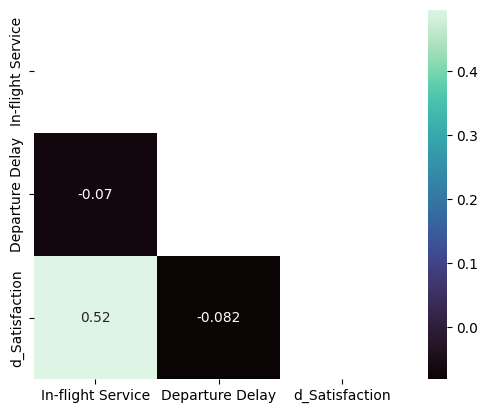

In [156]:
# heatmap of the correlation matrix between in-flight service, departure delays, and satisfaction for long-haul flights only

import seaborn as sns
import numpy as np

corr_arr = df[['In-flight Service', 'Departure Delay', 'd_Satisfaction']].corr()
mask = np.triu(np.ones_like(corr_arr, dtype=bool))
sns.heatmap(corr_arr, annot=True, mask=mask, cmap='mako', square=True, robust=True)

In [157]:
q3_2 = data[['In-flight Entertainment', 'Arrival Delay', 'd_Satisfaction']]

<Axes: >

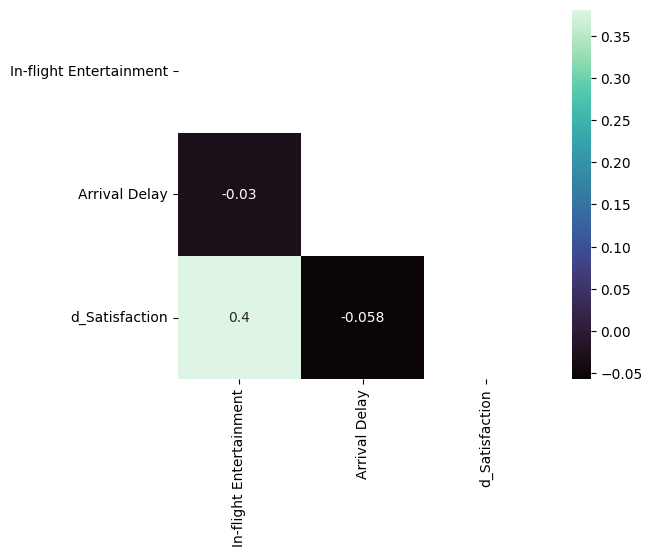

In [158]:
corr_arr_q3 = q3_2.corr()

mask_q3 = np.triu(np.ones_like(corr_arr_q3, dtype=bool))
sns.heatmap(corr_arr_q3, annot=True, mask=mask_q3, cmap='mako', square=True, robust=True)

In [159]:
q3_2[['In-flight Entertainment', 'Arrival Delay', 'd_Satisfaction']].corr('pearson')

,In-flight Entertainment,Arrival Delay,d_Satisfaction
In-flight Entertainment,1.000000,-0.030230,0.398234
Arrival Delay,-0.030230,1.000000,-0.058275
d_Satisfaction,0.398234,-0.058275,1.000000


<Axes: >

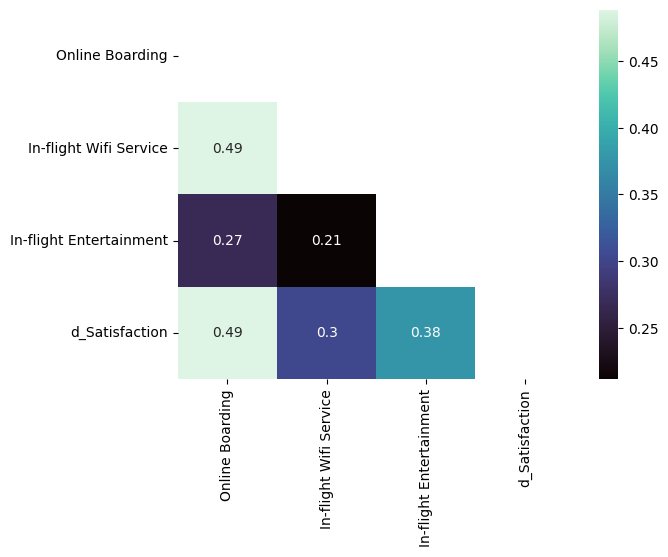

In [160]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(20, 10))
eda_data = data[data['Flight Distance'] < 3000]
eda = eda_data[["Online Boarding", "In-flight Wifi Service", "In-flight Entertainment", "d_Satisfaction"]].corr()
eda_mask = np.triu(np.ones_like(eda, dtype=bool))
sns.heatmap(eda, annot=True, mask=eda_mask, cmap='mako', square=False, robust=True)
# plt.show()

# Question 4

With Gender, Age, Type of travel, Flight distance, Class, Arrival delays, and Overall satisfaction as
attributes, determine association rules with a minimum support of 100 and a minimum confidence of
60%.

In [161]:
from mlxtend.frequent_patterns import apriori, association_rules

feat_data = data[['Gender', 'd_Age', 'Type of Travel', 'd_Flight Distance', 'Class', 'd_Arrival Delay', 'Satisfaction']]

# convert the data into one-hot encoded format
feat_data = pd.get_dummies(feat_data)

# find frequent itemsets with minimum support of 100
# support = 100 / total number of transactions
frequent_itemsets = apriori(feat_data, min_support=100/DATA_SIZE, use_colnames=True)

# generate association rules with minimum confidence of 60%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [162]:
# print the association rules
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Female),(Type of Travel_Business),0.507384,0.690584,0.352587,0.694912,1.006268,0.002196,1.014187,0.012644
1,(Gender_Female),(d_Flight Distance_Medium Haul),0.507384,0.610494,0.309478,0.609949,0.999106,-0.000277,0.998601,-0.001813
2,(Gender_Female),(d_Arrival Delay_Small),0.507384,0.769395,0.390453,0.769541,1.000190,0.000074,1.000635,0.000386
3,(Gender_Male),(Type of Travel_Business),0.492616,0.690584,0.337997,0.686126,0.993545,-0.002196,0.985797,-0.012644
4,(Gender_Male),(d_Flight Distance_Medium Haul),0.492616,0.610494,0.301016,0.611056,1.000921,0.000277,1.001445,0.001813
5,(Gender_Male),(d_Arrival Delay_Small),0.492616,0.769395,0.378942,0.769244,0.999804,-0.000074,0.999346,-0.000386
6,(d_Age_Child),(Type of Travel_Personal),0.057484,0.309416,0.043987,0.765202,2.473050,0.026200,2.941185,0.631969
7,(d_Age_Child),(d_Flight Distance_Medium Haul),0.057484,0.610494,0.038335,0.666890,1.092377,0.003242,1.169300,0.089723
8,(d_Age_Child),(Class_Economy),0.057484,0.448945,0.042624,0.741495,1.651638,0.016817,2.131697,0.418603
9,(d_Age_Child),(d_Arrival Delay_Small),0.057484,0.769395,0.043710,0.760380,0.988284,-0.000518,0.962380,-0.012422


# Question 5

Using PCA (Principal Component Analysis), combine features A10-A23 into a single feature. Let us call it PCAS. Now find average, minimum, and maximum of A10-A23 (computed for each passenger record). Let us call them AVES, MINS, and MAXS, respectively. Convert A24 (overall satisfaction) into a numeric value by converting neutral or unsatisfied to 1.0 and satisfied to 4. Let us call it DA24.

In [163]:
from sklearn.decomposition import PCA

# turn columns Departure and Arrival Time Convenience	Ease of Online Booking	Check-in Service	Online Boarding	Gate Location	On-board Service	Seat Comfort	Leg Room Service	Cleanliness	Food and Drink	In-flight Service	In-flight Wifi Service	In-flight Entertainment	Baggage Handling into one column using PCA and call it PCAS. 
# Then find the average, minimum, and maximum values of PCAS computed for each passenger record.
# Store the values in columns AVES, MINS, and MAXS respectively.
# Convert the satisfaction column to 0 for neutral or unsatisfied and 4 for satisfied and store it in the DA24 column.

pca_data = data[MAIN_FEATURES]

pca = PCA(n_components=1)
pca_data['PCAS'] = pca.fit_transform(pca_data)

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/106175203.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['PCAS'] = pca.fit_transform(pca_data)


In [164]:
pca_data['AVES'] = pca_data.mean(axis=1)
pca_data['MINS'] = pca_data.min(axis=1)
pca_data['MAXS'] = pca_data.max(axis=1)

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/3612397148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['AVES'] = pca_data.mean(axis=1)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/3612397148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['MINS'] = pca_data.min(axis=1)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/3612397148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [165]:
pca_data['DA24'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 4})

pca_data.drop(MAIN_FEATURES, axis=1, inplace=True)

pca_data.head()

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/2407804948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['DA24'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 4})
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/2407804948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data.drop(MAIN_FEATURES, axis=1, inplace=True)


,PCAS,AVES,MINS,MAXS,DA24
0,-2.793368,3.413775,-2.793368,5.0,0
1,-2.618732,3.358751,-2.618732,5.0,4
2,-2.684487,3.487701,-2.684487,5.0,4
3,-2.623032,3.358465,-2.623032,5.0,4
4,-1.319854,3.178676,-1.319854,5.0,4


In [166]:
# Which among PCAS, AVES, MINS, and MAXS could be used as proxy (or proxies) for DA24? You need to make some runs to answer this question.

In [169]:
pca_2 = PCA(n_components=3)

pca_data_2 = data[MAIN_FEATURES]

pca_data_2[['PCAS', 'PCAS2', 'PCAS3']] = pca_2.fit_transform(pca_data_2)

pca_data_2['AVES'] = pca_data_2.mean(axis=1)
pca_data_2['MINS'] = pca_data_2.min(axis=1)
pca_data_2['MAXS'] = pca_data_2.max(axis=1)

pca_data_2['DA24'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 4})

pca_data_2.drop(MAIN_FEATURES, axis=1, inplace=True)



/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/3171686620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data_2[['PCAS', 'PCAS2', 'PCAS3']] = pca_2.fit_transform(pca_data_2)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/3171686620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data_2[['PCAS', 'PCAS2', 'PCAS3']] = pca_2.fit_transform(pca_data_2)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/3171686620.py:5: SettingWithCopyWarning: 
A v

In [170]:
pca_data_2.head()

,PCAS,PCAS2,PCAS3,AVES,MINS,MAXS,DA24
0,-2.793368,1.328072,0.845231,3.139996,-2.793368,5.0,0
1,-2.618737,2.452297,-1.761764,3.004223,-2.618737,5.0,4
2,-2.684498,-1.248234,2.658093,3.160315,-2.684498,5.0,4
3,-2.623032,2.733387,-1.589161,3.030658,-2.623032,5.0,4
4,-1.319867,0.102032,1.683850,2.909766,-1.319867,5.0,4


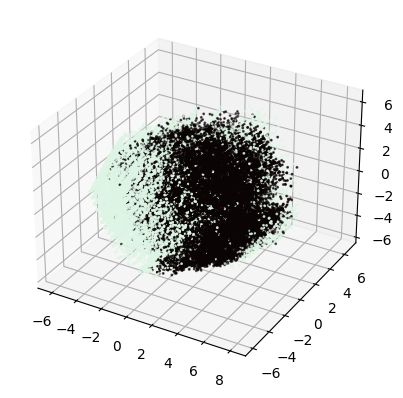

In [174]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_data_2['PCAS'], pca_data_2['PCAS2'], pca_data_2['PCAS3'], c=pca_data_2['DA24'], cmap='mako', s=1)

plt.show()

# Question 6

Using linear regression, model the relationship between (i) flight distance (in miles) and arrival delay (in minutes), and (ii) flight distance (in miles) and departure delay (in minutes). Explain the derived models and their accuracy. State whether such a relationship makes sense based on the derived models.

In [244]:
# Using linear regression, model the relationship between (i) flight distance (in miles) and arrival delay (in minutes), and (ii) flight distance (in miles) and departure delay (in minutes). Explain the derived models and their accuracy. State whether such a relationship makes sense based on the derived models.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr_features = data[['Flight Distance', 'Arrival Delay', 'Departure Delay']]

# find nan values in the data

lr_features.isna().sum()

# inspect nan values

lr_features[lr_features.isna().any(axis=1)]

# fill nan values with the mean of the column

lr_features.fillna(lr_features.mean(), inplace=True)

# inspect nan values again

lr_features.info()

lr.fit(X=lr_features[['Flight Distance']], y=lr_features[['Arrival Delay']])
print(lr.coef_, lr.intercept_)
print(lr.score(lr_features[['Flight Distance']], lr_features[['Arrival Delay']]))
print(lr.predict([[1000]]))

lr.fit(X=lr_features[['Flight Distance']], y=lr_features[['Departure Delay']])
print(lr.coef_, lr.intercept_)
print(lr.score(lr_features[['Flight Distance']], lr_features[['Departure Delay']]))
print(lr.predict([[1000]]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Flight Distance  129880 non-null  int64  
 1   Arrival Delay    129880 non-null  float64
 2   Departure Delay  129880 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 3.0 MB
[[-7.43860229e-05]] [15.17967174]
3.731960774966403e-06
[[15.10528572]]
[[9.16806243e-05]] [14.60458371]
5.7696318497280075e-06
[[14.69626433]]


/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_21081/3737735543.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_features.fillna(lr_features.mean(), inplace=True)
/Users/dpapp/Projects/CS 773/project/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/dpapp/Projects/CS 773/project/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


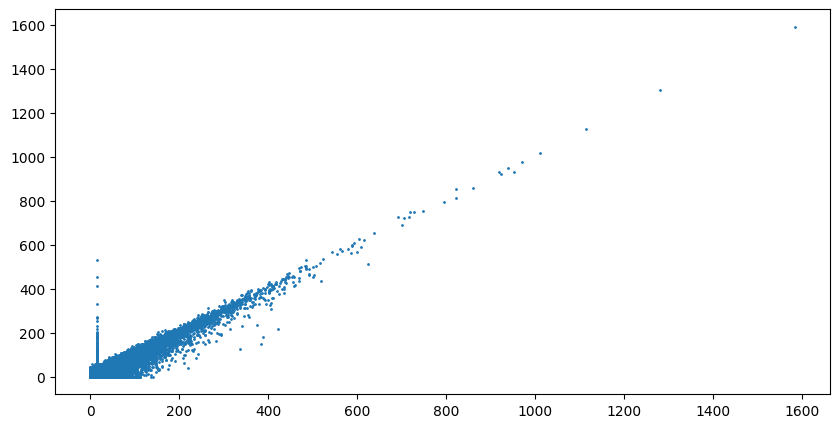

In [245]:
# plot the relationship between flight distance and arrival delay as well as departure delay
# add the regression line to the plot

ax, fig = plt.subplots(figsize=(10, 5))

# plt.scatter(lr_features['Flight Distance'], lr_features['Arrival Delay'], s=1, c='navy')
# plt.scatter(lr_features['Flight Distance'], lr_features['Departure Delay'], s=1, c='gold')
plt.scatter(lr_features['Arrival Delay'], lr_features['Departure Delay'], s=1)

# plt.plot(lr_features['Flight Distance'], lr.predict(lr_features[['Flight Distance']]), c='black')

plt.show()